In [1]:
import random
import string
import time
import matplotlib.pyplot as plt
from sorters.index_sorter import IndexSorter
from sorters.bucket_sorter import BucketSorter

INPUT_FILE = 'input.txt'
OUTPUT_FILE = 'output.txt'

In [2]:
def generate_file(file_path):
    with open(file_path, 'w') as file:
        for _ in range(1000):
            line_length = random.randint(1, 256)
            line = ''.join(random.choice(string.ascii_lowercase) for _ in range(line_length))
            file.write(line + '\n')

In [3]:
generate_file(INPUT_FILE)
index_sorter = IndexSorter(INPUT_FILE, OUTPUT_FILE)
index_sorter.run()

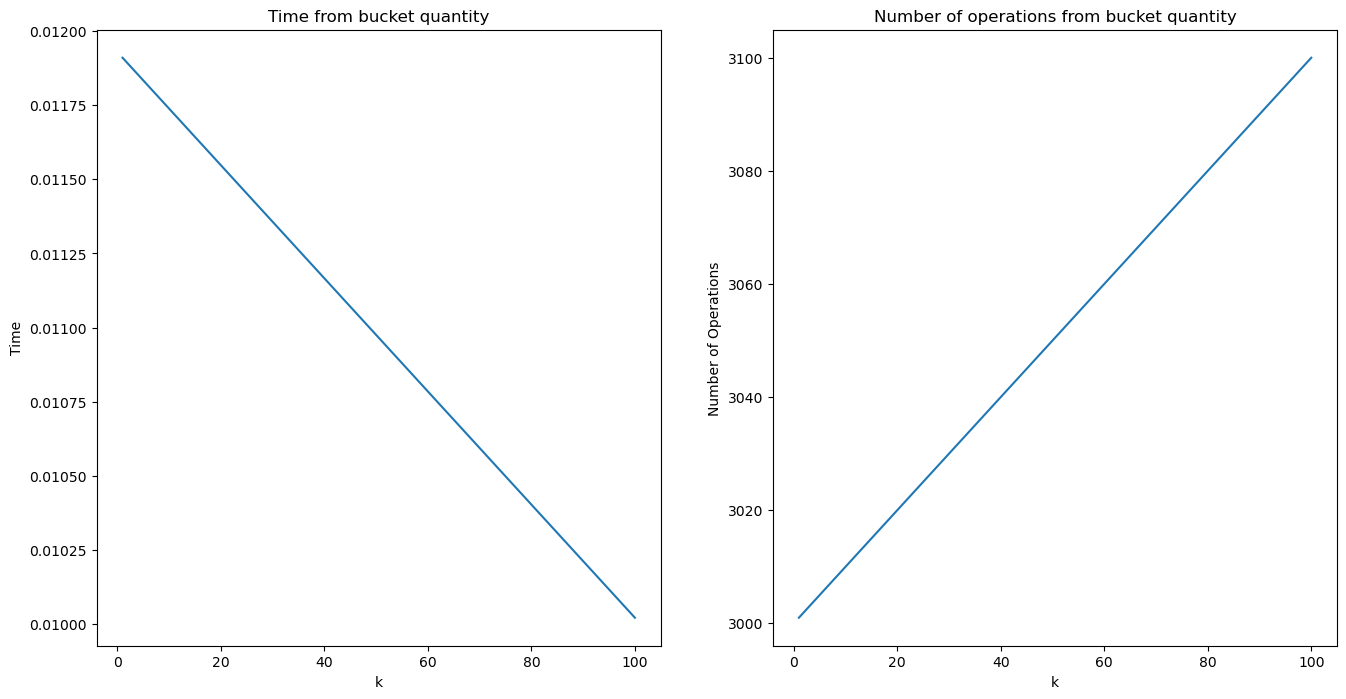

In [12]:
N = 1000
A = 0
B = 1000
K_VALUES = [1, 100]

def generate_random_numbers(n, a, b):
    return [random.uniform(a, b) for _ in range(n)]

def analyze_bucket_sort(n, a, b, k_values):
    time = []
    operations = []
    
    bucket_sorter = BucketSorter()
    
    for k in k_values:
        numbers = generate_random_numbers(n, a, b)
        bucket_sorter.reinit(numbers, k)

        bucket_sorter.run()
        
        time.append(bucket_sorter.time)
        
        operations.append(bucket_sorter.operations)

    return time, operations


time, operations = analyze_bucket_sort(N, A, B, K_VALUES)

plt.rcParams["figure.figsize"] = (16, 8)

plt.subplot(1, 2, 1)
plt.plot(K_VALUES, time)
plt.xlabel('k')
plt.ylabel('Time')
plt.title('Time from bucket quantity')

plt.subplot(1, 2, 2)
plt.plot(K_VALUES, operations)
plt.xlabel('k')
plt.ylabel('Number of Operations')
plt.title('Number of operations from bucket quantity')

plt.show()
